<a href="https://colab.research.google.com/github/vansh7nvc/AI-ML/blob/main/DECISION_TREES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris = load_iris()
X = iris.data[:,2:]
y = iris.target

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth= 2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [ ]:
from sklearn.tree import export_graphviz


In [ ]:
export_graphviz(
    tree_clf,
    out_file = "iris_tree.dot",
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

In [ ]:
!dot -Tpng iris_tree.dot -o iris_tree.png

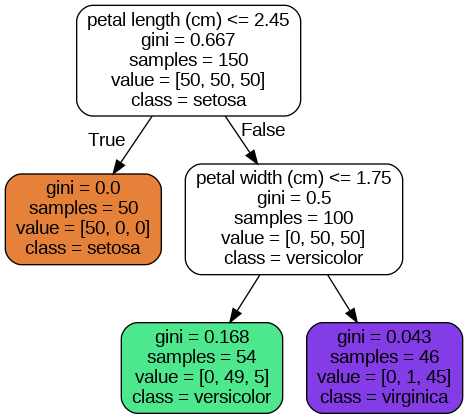

In [ ]:
from IPython.display import Image
Image(filename='iris_tree.png')

# THE CART ALGORITHM


The CART (Classification and Regression Tree) algorithm is a decision tree algorithm used for both classification and regression tasks. It works by recursively splitting the data based on features to create a tree-like structure that can predict the target variable. The algorithm selects the split that maximizes the information gain (for classification) or minimizes the mean squared error (for regression).



# GINI IMPURITY OR ENTROPY

Gini impurity and entropy are two common measures used in decision tree algorithms like CART to evaluate the "purity" of a node.

*   **Gini Impurity:** This measures how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the subset. A Gini impurity of 0 means the node is pure (all elements belong to the same class).
*   **Entropy:** This measures the randomness or unpredictability in a set of data. Like Gini impurity, an entropy of 0 means the node is pure.

Both measures help the algorithm decide which feature and split point will best separate the data into more homogeneous subsets, leading to better predictions.

# REGULARIZATION HYPERPARAMETERS

Decision trees can be prone to overfitting, especially when they are deep and complex. Regularization hyperparameters are used to constrain the growth of the tree and prevent it from becoming too complex, thus reducing overfitting. Some common regularization hyperparameters for decision trees include:

*   **`max_depth`**: This limits the maximum depth of the tree. A shallower tree is less likely to overfit.
*   **`min_samples_split`**: This specifies the minimum number of samples required to split an internal node. A larger value prevents splitting on small groups of samples, which might be outliers.
*   **`min_samples_leaf`**: This specifies the minimum number of samples required to be at a leaf node. Similar to `min_samples_split`, a larger value prevents the creation of leaf nodes with very few samples.
*   **`max_leaf_nodes`**: This limits the maximum number of leaf nodes in the tree.
*   **`max_features`**: This specifies the number of features to consider when looking for the best split. Limiting the number of features considered at each split can help prevent the tree from relying too heavily on any single feature.
*   **`min_impurity_decrease`**: This threshold for a split to occur. A split will only be made if it decreases the impurity by at least this amount.

By tuning these hyperparameters, you can control the complexity of the decision tree and improve its generalization performance on unseen data.

# REGRESSION

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

Decision Tree Regression works similarly to Decision Tree Classification, but instead of predicting a class label, it predicts a continuous value. The tree is built by splitting the data based on features to minimize a measure of error, usually the Mean Squared Error (MSE), within each node. The prediction for a new instance is the average target value of the training instances in the leaf node it falls into.

# INSTA

Decision trees can be quite sensitive to small variations in the training data, which leads to their instability. Here's a more detailed explanation:

*   **Sensitivity to Data Variations:** A slight change in the training data, such as adding or removing a few data points or changing the values of some features, can lead to a completely different tree structure. This is because the algorithm greedily makes splits based on the data it sees at each step. A small change can alter which feature or split point is chosen as the best at a particular node, and this decision propagates down the tree, potentially creating a very different set of branches and leaf nodes.

*   **Greedy Approach:** The CART algorithm (and many other decision tree algorithms) uses a greedy approach. At each step, it looks for the best split at the current node without considering how that split might affect future splits or the overall structure of the tree. This can lead to locally optimal splits that are not globally optimal for the entire tree.

*   **Axis-Parallel Splits:** Decision trees create decision boundaries that are perpendicular to the feature axes. This can be a limitation when the true decision boundary is diagonal or curved. Small changes in the data can cause the axis-parallel splits to shift significantly, leading to different classifications or predictions for data points near the boundary.

*   **Prone to Overfitting:** As mentioned before, decision trees can easily overfit the training data, especially when they are deep and complex. Overfitting means the tree has learned the training data too well, including its noise and idiosyncrasies, and does not generalize well to unseen data. This overfitting contributes to instability because the tree's structure is highly dependent on the specific training instances.

*   **Lack of Smoothness:** Decision trees create piece-wise constant prediction surfaces (for regression) or decision boundaries (for classification). This lack of smoothness means that a small change in the input features can lead to a large jump in the predicted output or a change in the predicted class.

Because of this instability, decision trees are often used in ensemble methods like Random Forests and Gradient Boosting, which combine the predictions of multiple trees to reduce variance and improve robustness.